## Import dependecies and define fuctions

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
from scipy.optimize import curve_fit, fsolve
from scipy.interpolate import make_interp_spline, BSpline
from scipy import interpolate

from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
import warnings
warnings.filterwarnings("ignore")

In [2]:
# install lmfit regression module
#! pip install lmfit
from lmfit.models import ConstantModel, StepModel
from lmfit import Model, Minimizer, Parameters, report_fit

## Import data and assign the x, y values 

In [3]:
# import csv data
df0= pd.read_csv("C:/Users/jeja9/APTanalysis/Interfacial_width/Re700/Radius/radius700.csv") 
print(f"shape {df0.shape}\n")
df = df0.iloc[2:]
print(f"shape {df.shape}\n")
df

shape (8, 4)

shape (6, 4)



,time_h,time_s,radius,radius_err
2,1.0,3600,3.1541,1.337
3,4.0,14400,4.5570,1.732
4,16.0,57600,7.3270,1.986
5,64.0,230400,11.0430,3.073
6,256.0,921600,16.1720,4.213
7,1024.0,3686400,27.3580,6.635


## rate constant and exponent

In [4]:
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()
print(x)
print(y)
print(y_err)

[   3600   14400   57600  230400  921600 3686400]
[ 3.15409955  4.557       7.327      11.043      16.172      27.358     ]
[1.337 1.732 1.986 3.073 4.213 6.635]


Popt: [6.20000000e-03 3.28108117e-01 3.86909132e+02]
pcov:  [[ 5.82920566e-06 -3.62474049e-05 -5.16293970e-01]
 [-3.62474049e-05  2.33112157e-04  3.17215007e+00]
 [-5.16293970e-01  3.17215007e+00  5.03148172e+04]]

A = 0.006199999999999999 +/- 0.0024143747963273074
p = 0.3281081168746532 +/- 0.015268010917452807
to = 386.90913220773444 +/- 224.3096457112783
R_2: 0.9965


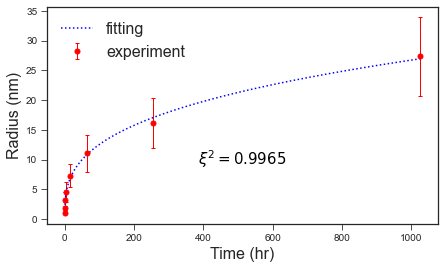

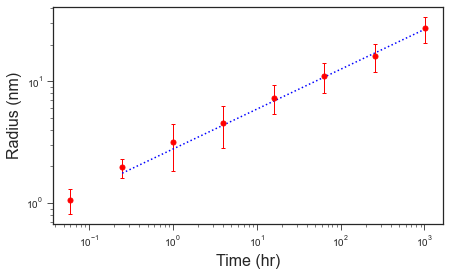

In [5]:
# Define the opwer function
# define a : rate_constant, b: exponent c:logistic Intercept

def power(x, A, p, to):
    return (A*(x-to)+(A*to)**(1/p))**p

# fitting power plot with 2sigma
popt, pcov = curve_fit(power, x, y, bounds=([0.00001, 0, 0], [0.0062, 2, 14400]), sigma=y_err) 
print("Popt:", popt)
print("pcov: ", pcov)
print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
print("p =", popt[1], "+/-", pcov[1,1]**0.5)
print("to =", popt[2], "+/-", pcov[2,2]**0.5)

A = popt[0]
p = popt[1]
to = popt[2]/3600


# Calcualte the R_squared value
best_fit = (A*(x-to)+(A*to)**(1/p))**p
R_squared = round(r2_score(best_fit, y), 4)
print(f"R_2: {R_squared}")

# model_fit with fine scale
xfine = np.linspace(900, 3686400, 100000) 
f2 = (A*(xfine-to)+(A*to)**(1/p))**p

#time scale from second to hour

x0b = x0/3600
xfineb = xfine/3600

fig, ax = plt.subplots(figsize=(7,4))
#log-log
#ax.loglog(x0b, y0, ['r.'], markersize=10)
#ax.loglog(x2b, f2, 'b:', label=r'fitting')
# linear-linear
ax.errorbar(x0b, y0, y0_err, fmt='r.', markersize=10, elinewidth=1, capsize=2,label='experiment')
ax.plot(xfineb, f2, 'b:', label=r'fitting')
ax.legend(loc='best', fontsize=16)
plt.xlabel("Time (hr)", fontsize=16)
plt.ylabel('Radius (nm)', fontsize=16)
#plt.text(0,0, 'Sum of vales = %s\n Total number of entries = %s\n Avg= %s \n Standard Deviation = %s' % (S, N, avg, sigma))
ax.text(0.5, 0.3, r'$\xi^2={}$'.format(R_squared), ha='center', va='center', transform=ax.transAxes, color="k", fontsize=15)
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
ax.errorbar(x0b, y0, y0_err, fmt='r.', markersize=10, elinewidth=1, capsize=2,label='experiment')
ax.plot(xfineb, f2, 'b:', label=r'fitting')
plt.xlabel("Time (hr)", fontsize=16)
plt.ylabel('Radius (nm)', fontsize=16)
plt.yscale("log")
plt.xscale("log")
plt.show()
#plt.savefig("test.png")

### plots for n =2, 2.4, 3, 4


exponent value (1/p) = 2
Popt: [2.89181118e-04 1.44000000e+04]
pcov:  [[ 4.38996058e-09 -2.63187639e-01]
 [-2.63187639e-01  2.33063978e+07]]

A = 0.0002891811182214535 +/- 6.625677764005216e-05
to = 14399.999999999984 +/- 4827.670017650838
R_2: 0.939

exponent value (1/p) = 2.4
Popt: [9.58447516e-04 3.80448138e+03]
pcov:  [[ 2.73386412e-08 -1.35956179e-01]
 [-1.35956179e-01  1.03806966e+06]]

A = 0.0009584475157724102 +/- 0.00016534400870427333
to = 3804.4813820493623 +/- 1018.8570357524477
R_2: 0.9768

exponent value (1/p) = 3
Popt: [5.49116104e-03 4.55973392e+02]
pcov:  [[ 1.30780798e-07 -1.93617028e-02]
 [-1.93617028e-02  6.97473166e+03]]

A = 0.0054911610392596386 +/- 0.0003616362781639324
to = 455.97339192460294 +/- 83.514858890296
R_2: 0.997

exponent value (1/p) = 4
Popt: [ 0.06023763 10.45931634]
pcov:  [[ 3.58031422e-04 -7.28893381e+04]
 [-7.28893381e+04  6.28309832e+13]]

A = 0.060237625327960294 +/- 0.01892171827162676
to = 10.45931633617604 +/- 7926599.723315635
R_2: 0.850

Text(0, 0.5, '$<R>^p{} $')

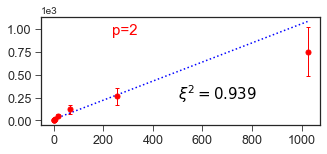

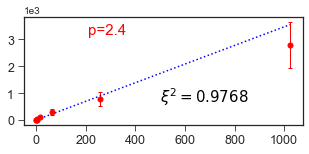

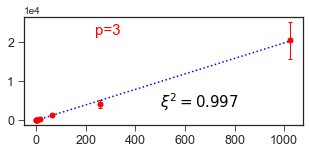

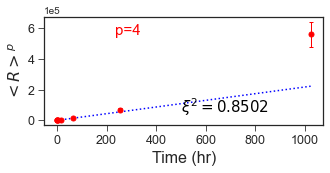

In [6]:
#plot with n= 2, 2.4, 3, 4

for i in [2, 2.4, 3, 4]:

    # Define the opwer function
    # define a : rate_constant, b: exponent c:logistic Intercept
    print ("\nexponent value (1/p) =", i)
    p = 1/i
    def power(x, A, to):
        return (A*(x-to)+(A*to)**(1/p))**p

    # fitting power plot with 2sigma
    popt, pcov = curve_fit(power, x, y, bounds=([0,  0], [0.5, 14400]), sigma=y_err) 
    print("Popt:", popt)
    print("pcov: ", pcov)
    print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
    print("to =", popt[1], "+/-", pcov[1,1]**0.5)


    A = popt[0]
    to = popt[1]

    # Calcualte the R_squared value
    best_fit = (A*(x-to)+(A*to)**(1/p))**p
    R_squared = round(r2_score(best_fit, y), 4)
    print(f"R_2: {R_squared}")

    # model_fit with fine scale
    xfine = np.linspace(900, 3686400, 100000) 
    f2 = (A*(xfine-to)+(A*to)**(1/p))**p

    #time scale change from second to hour

    x0b = x0/3600
    xfineb = xfine/3600
    
    #factorial p for radius (fuction)
    rescale_y0 = y0**i
    rescale_y0err = ((((y0+y0_err)/2)**i)**2-(((y0-y0_err)/2)**i)**2)**0.5
    rescale_f2 =f2**i
    
    fig, ax = plt.subplots(figsize=(5,2))
    #log-log
    #ax.loglog(x0b, y0, ['r.'], markersize=10)
    #ax.loglog(x2b, f2, 'b:', label=r'fitting')
    # linear-linear
    ax.errorbar(x0b, rescale_y0, rescale_y0err, fmt='r.', markersize=10, elinewidth=1, capsize=2,label='experiment')
    ax.plot(xfineb, rescale_f2, 'b:', label=r'fitting')
    #ax.text(0, 28**i, r'p={}'.format(i), color="k", fontsize=16)
    # label in a defalut axes coords
    ax.text(0.3, 0.87, r'p={}'.format(i), ha='center', va='center', transform=ax.transAxes, size=15, color='red')
    ax.text(500, 15**i, r'$\xi^2={}$'.format(R_squared), color="k", fontsize=15)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=12.5)
    plt.yticks(fontsize=12.5)
    
plt.xlabel("Time (hr)", fontsize=16)
plt.ylabel(r'$<R>^p{} $', fontsize=16)

In [7]:
# plot R_squre versus eponent value 

0.9964
3.0831663326653307
0.3243418914527137


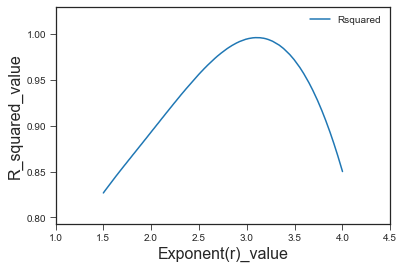

In [8]:
#plot with n= 1.5-4
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()

rsq_dict ={}

for i in np.linspace(1.5, 4, 500):

    # Define the opwer function
    # define a : rate_constant, b: exponent c:logistic Intercept
    #print ("\nexponent value (1/p) =", i)
    p = 1/i
    def power(x, A):
        return A*(x)**p

    # fitting power plot with 2sigma
    popt, pcov = curve_fit(power, x, y, sigma=y_err) 
    #print("Popt:", popt)
    #print("pcov: ", pcov)
    #print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
    #print("to =", popt[1], "+/-", pcov[1,1]**0.5)


    A = popt[0]
    #to = popt[1]

    # Calcualte the R_squared value
    best_fit = A*(x)**p
    R_squared = round(r2_score(best_fit, y), 4)
    #print(f"R_2: {R_squared}")
    rsq_dict[i] = R_squared
    # model_fit with fine scale
    xfine = np.linspace(900, 3686400, 100000) 
    f2 = (A*(xfine-to)+(A*to)**(1/p))**p

rsq_df=pd.DataFrame.from_dict(rsq_dict, orient='index',
                       columns=['Rsquared'])

print(rsq_df["Rsquared"].max())
print(rsq_df["Rsquared"].idxmax())
print(1/rsq_df["Rsquared"].idxmax())
rsq_df.plot(y='Rsquared', kind = 'line')
plt.xlabel("Exponent(r)_value", fontsize=16)
plt.ylabel( "R_squared_value", fontsize=16)
plt.margins(0.2)
plt.show()


In [9]:

rsq_df

,Rsquared
1.50000,0.8267
1.50501,0.8275
1.51002,0.8282
1.51503,0.8289
1.52004,0.8296
...,...
3.97996,0.8573
3.98497,0.8555
3.98998,0.8537
3.99499,0.8519


0.9964
3.0831663326653307
0.3243418914527137


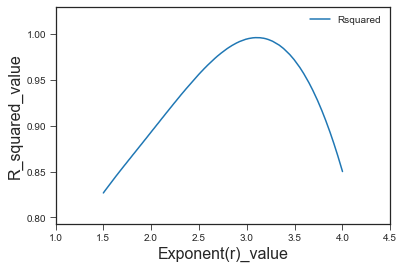

In [10]:
print(rsq_df["Rsquared"].max())
print(rsq_df["Rsquared"].idxmax())
print(1/rsq_df["Rsquared"].idxmax())
rsq_df.plot(y='Rsquared', kind = 'line')
plt.xlabel("Exponent(r)_value", fontsize=16)
plt.ylabel( "R_squared_value", fontsize=16)
plt.margins(0.2)
plt.show()